**Name:** Alex Medina

**File:** Using the Pickle

Peter used PICASO 1D climate model for TP profiles at a high enough resolution. Theodora made reference to instead of doing that, using the pickle, so here I am looking at just understanding the pickles contents and how to use it.

In [15]:
# Important imports
import numpy as np
import matplotlib.pyplot as plt
import pickle

1. Loading the pickle as a numpy array

In [ ]:
pickle_path = r"C:\Users\Alex\Desktop\Picaso\NN_project\bobcat_to_diamondback.pickle"
arr = np.load(pickle_path, allow_pickle=True)
arr.shape

(301, 41, 5, 91)

So the pickel is a ndarray with shape (301, 41, 5, 91). But there are no labels, so more stats needed.

2. Basic Axis Stats

In [14]:
# Looking at each axis

def describe_component(a):
    return {
        "min": float(np.min(a)),
        "max": float(np.max(a)),
    }

nT, nG, nV, nL = arr.shape
stats = [describe_component(arr[:,:,iv,:]) for iv in range(nV)]
stats

[{'min': 0.8898064126647028, 'max': 2.44020727655124},
 {'min': 0.9802112838852172, 'max': 2.1015116248079786},
 {'min': 0.9792838183727298, 'max': 1.7035941631396898},
 {'min': 0.9786682932127908, 'max': 1.5468162198731505},
 {'min': 0.9523305268284631, 'max': 1.3558395845598596}]

Will update with more ideas but tentatively we have:
- Axis 0: Teff index (size ~301)
- Axis 1: Gravity index (size ~41)
- Axis 2: Variable index (size 5)
- Axis 3: Vertical levels (size ~91)

3. Visualizations

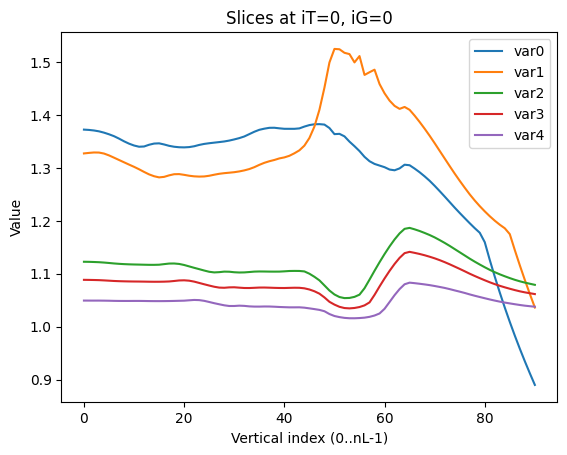

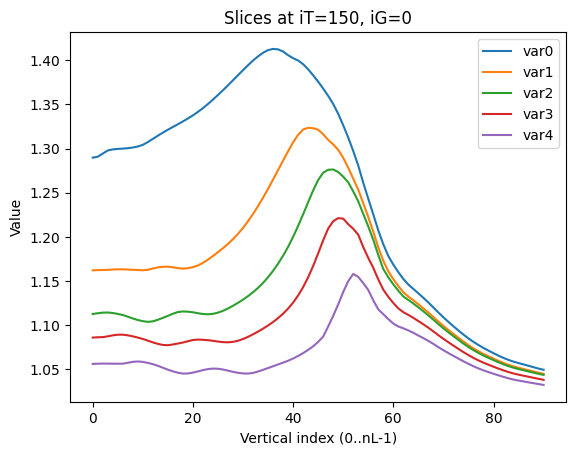

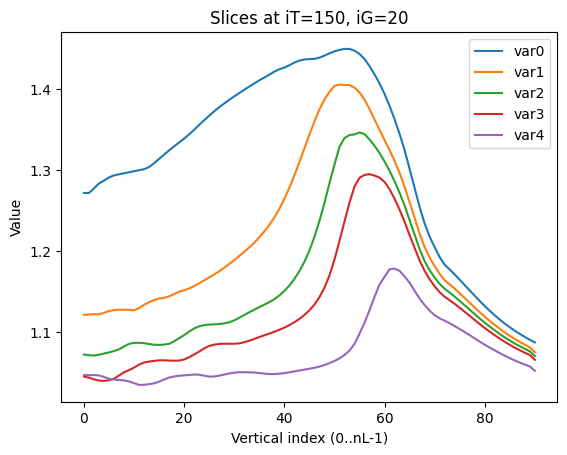

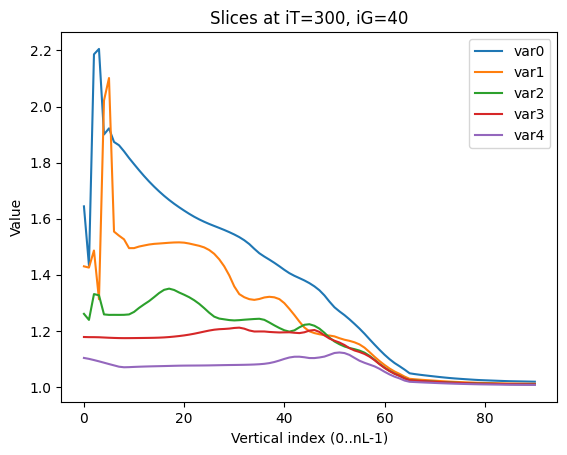

In [16]:
examples = [(0,0), (nT//2, 0), (nT//2, nG//2), (nT-1, nG-1)]

for (iT, iG) in examples:
    plt.figure()
    for iv in range(nV):
        plt.plot(range(nL), arr[iT, iG, iv, :], label=f"var{iv}")
    plt.xlabel("Vertical index (0..nL-1)")
    plt.ylabel("Value")
    plt.title(f"Slices at iT={iT}, iG={iG}")
    plt.legend()
    plt.show()

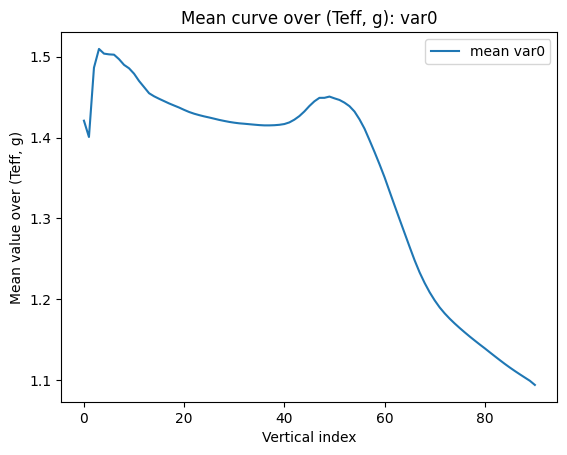

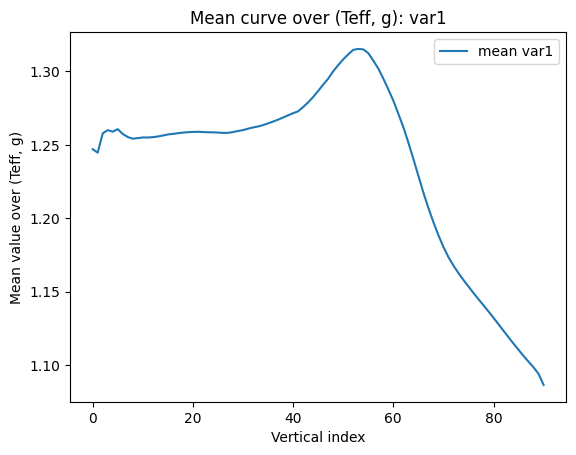

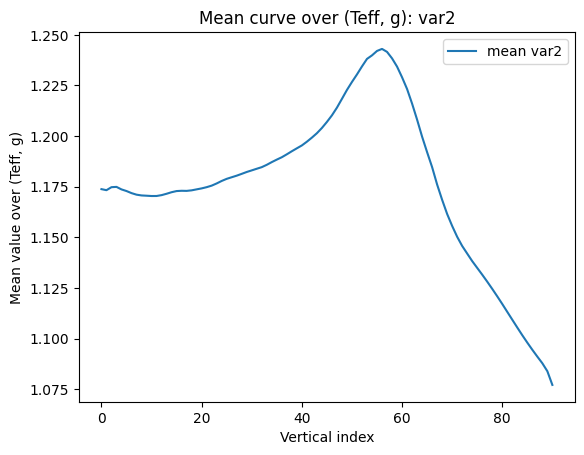

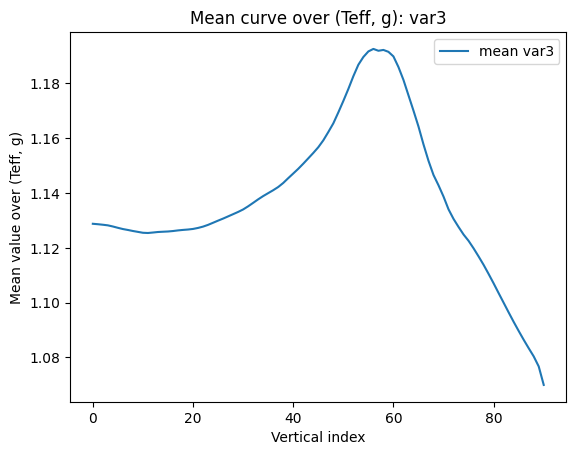

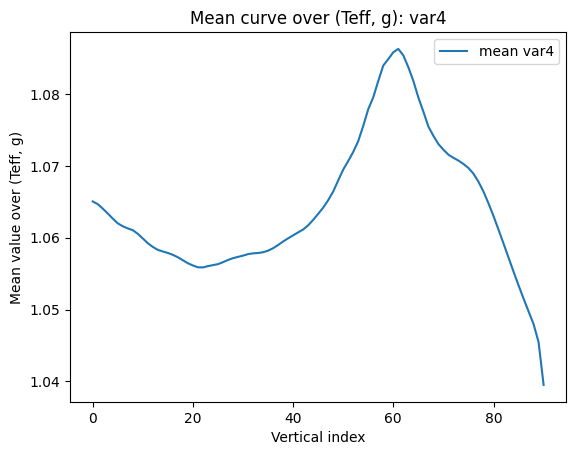

In [17]:
for iv in range(nV):
    plt.figure()
    mean_curve = np.mean(arr[:, :, iv, :], axis=(0,1))
    plt.plot(range(nL), mean_curve, label=f"mean var{iv}")
    plt.xlabel("Vertical index")
    plt.ylabel("Mean value over (Teff, g)")
    plt.title(f"Mean curve over (Teff, g): var{iv}")
    plt.legend()
    plt.show()

In [18]:
def interpolate_to_uniform_logP(P_bar, T_K, n_levels=100, p_min=None, p_max=None):
    P = np.asarray(P_bar).astype(float)
    T = np.asarray(T_K).astype(float)
    mask = np.isfinite(P) & np.isfinite(T) & (P > 0)
    P, T = P[mask], T[mask]
    order = np.argsort(P)
    P, T = P[order], T[order]

    pmin = P.min() if p_min is None else max(p_min, P.min())
    pmax = P.max() if p_max is None else min(p_max, P.max())
    logP = np.log10(P)
    grid = np.linspace(np.log10(pmin), np.log10(pmax), n_levels)
    T_new = np.interp(grid, logP, T)
    P_new = 10**grid
    return P_new, T_new